In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("dataset")

['Test', 'Train', 'Valid']

In [3]:
len(os.listdir("dataset/Train/Covid19 Positive"))

2440

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train set:
Covid19 Positive=2440
Covid19 Negative=6879
Test set:
Covid19 Positive=904
Covid19 Negative=2548
Validation set:
Covid19 Positive=272
Covid19 Negative=765


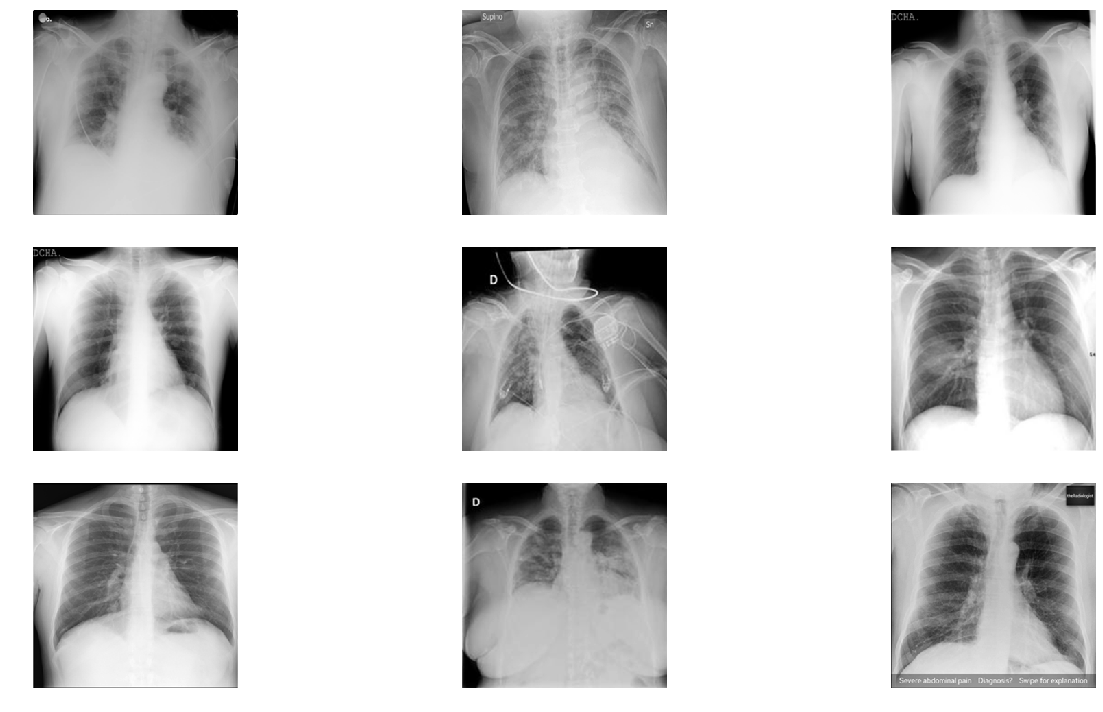

In [4]:
train_dir = "dataset/Train"
test_dir = "dataset/Test"
val_dir = "dataset/Valid"

print("Train set:\n========================================")
num_Covid19_Positive = len(os.listdir(os.path.join(train_dir, 'Covid19 Positive')))
num_Covid19_Negative = len(os.listdir(os.path.join(train_dir, 'Covid19 Negative')))
print(f"Covid19 Positive={num_Covid19_Positive}")
print(f"Covid19 Negative={num_Covid19_Negative}")

print("Test set:\n========================================")
print(f"Covid19 Positive={len(os.listdir(os.path.join(test_dir, 'Covid19 Positive')))}")
print(f"Covid19 Negative={len(os.listdir(os.path.join(test_dir, 'Covid19 Negative')))}")

print("Validation set:\n========================================")
print(f"Covid19 Positive={len(os.listdir(os.path.join(val_dir, 'Covid19 Positive')))}")
print(f"Covid19 Negative={len(os.listdir(os.path.join(val_dir, 'Covid19 Negative')))}")

pneumonia = os.listdir("dataset/Train/Covid19 Positive")
pneumonia_dir = "dataset/train/Covid19 Positive"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

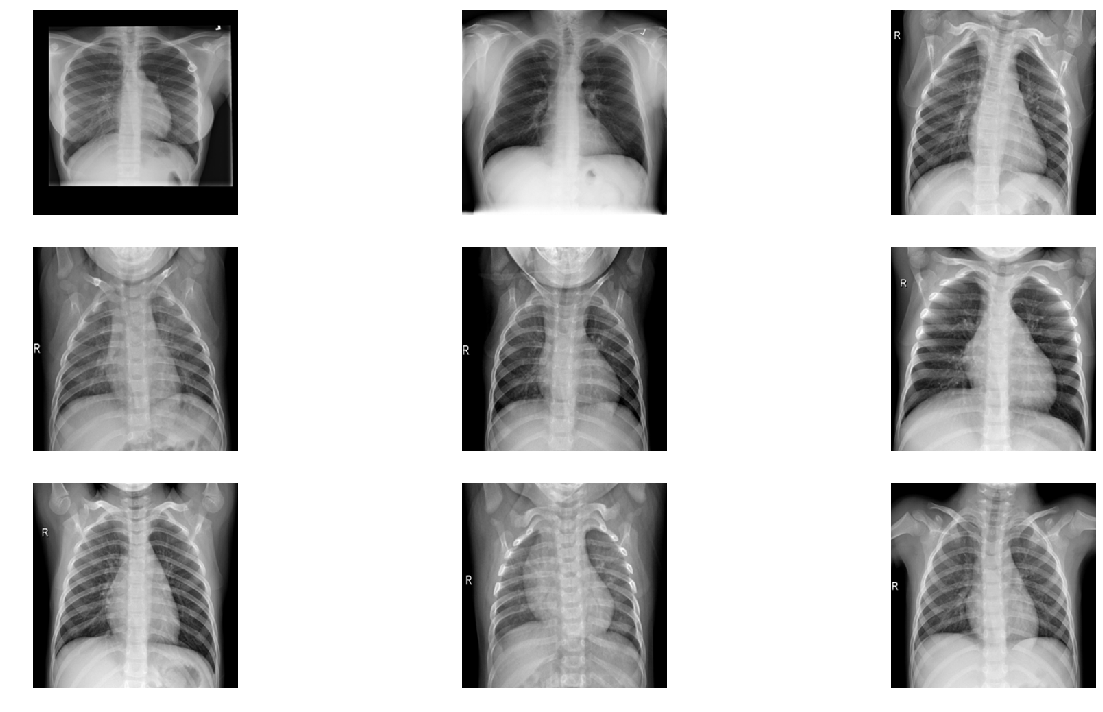

In [5]:
normal = os.listdir("dataset/Train/Covid19 Negative")
normal_dir = "dataset/Train/Covid19 Negative"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 299 pixels width and 299 pixels height, one single color channel.
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.3341 and the standard deviation is 0.2795


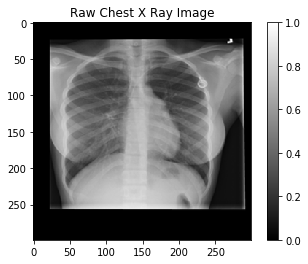

In [6]:
Covid19_Negative_img = os.listdir("dataset/Train/Covid19 Negative")[0]
Covid19_Negative_dir = "dataset/Train/Covid19 Negative"
sample_img = plt.imread(os.path.join(normal_dir,Covid19_Negative_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

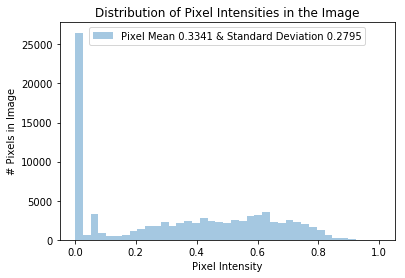

In [7]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [8]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [9]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 9319 images belonging to 2 classes.
Found 1037 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.0052 and the minimum is -3.0956
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


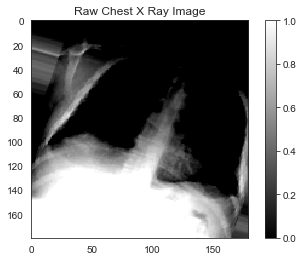

In [10]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

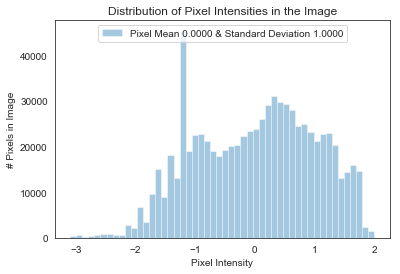

In [11]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [12]:
# Class weights

weight_for_0 = num_Covid19_Positive / (num_Covid19_Negative + num_Covid19_Positive)
weight_for_1 = num_Covid19_Negative / (num_Covid19_Negative + num_Covid19_Positive)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.26
Weight for class 1: 0.74


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 86, 86, 64)       

In [14]:
r = model.fit(
    train, 
    epochs=25,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=300,
    validation_steps=25,
)

Epoch 1/25
300/300 [==============================] - 325s 1s/step - loss: 0.6300 - accuracy: 0.6503 - val_loss: 0.1319 - val_accuracy: 0.8800
Epoch 2/25
300/300 [==============================] - 319s 1s/step - loss: 0.3917 - accuracy: 0.7033 - val_loss: 0.8573 - val_accuracy: 0.6400
Epoch 3/25
300/300 [==============================] - 320s 1s/step - loss: 0.2161 - accuracy: 0.7563 - val_loss: 2.0371 - val_accuracy: 0.5600
Epoch 4/25
300/300 [==============================] - 309s 1s/step - loss: 0.3133 - accuracy: 0.7521 - val_loss: 2.7973 - val_accuracy: 0.4400
Epoch 5/25
300/300 [==============================] - 307s 1s/step - loss: 0.2265 - accuracy: 0.7520 - val_loss: 0.7768 - val_accuracy: 0.7200
Epoch 6/25
300/300 [==============================] - 306s 1s/step - loss: 0.2139 - accuracy: 0.7808 - val_loss: 0.0869 - val_accuracy: 0.6400
Epoch 7/25
300/300 [==============================] - 340s 1s/step - loss: 0.1890 - accuracy: 0.7917 - val_loss: 0.0932 - val_accuracy: 0.8000

Text(0.5, 1.0, 'Accuracy Evolution')

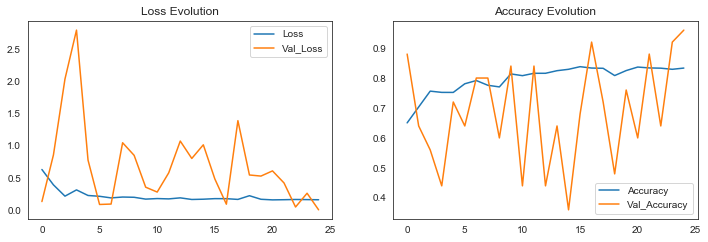

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [16]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3452/3452 [==============================] - 139s 40ms/step
Test Accuracy: 73.44%
1165/1165 [==============================] - 348s 298ms/step
Train Accuracy: 86.21%


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

In [18]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[2330  218]
 [ 595  309]]


,0,1,micro avg,macro avg,weighted avg
precision,0.796581,0.586338,0.764484,0.691459,0.741523
recall,0.914443,0.341814,0.764484,0.628128,0.764484
f1-score,0.851453,0.431866,0.764484,0.641659,0.741572
support,2548.000000,904.000000,3452.000000,3452.000000,3452.000000


In [ ]:
from tensorflow.keras.models import load_model

model.save('Cnn.h5')

# Transfer Learning
# DenseNet

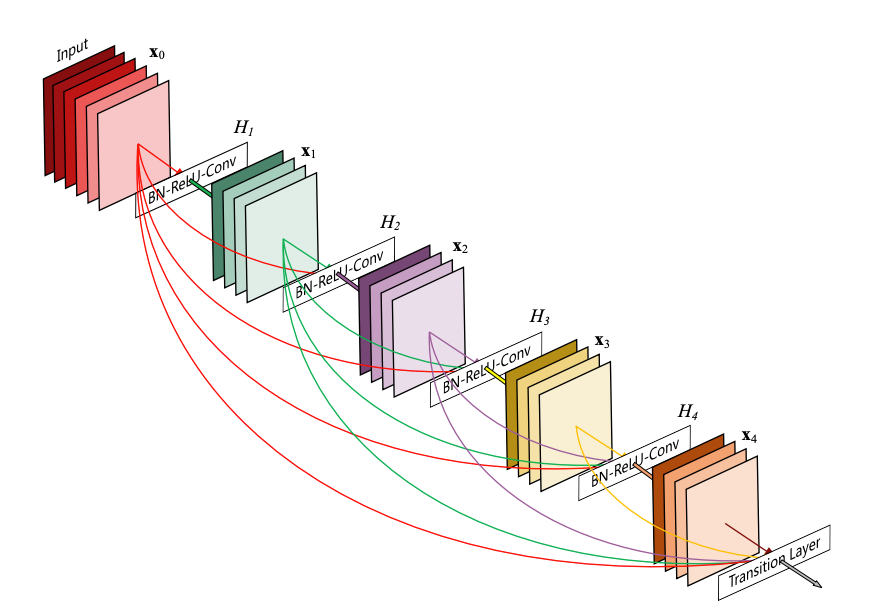

In [1]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Using TensorFlow backend.


Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [20]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [21]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape Tensor("input_1:0", shape=(None, 180, 180, 3), dtype=float32)
The output shape Tensor("avg_pool/Mean:0", shape=(None, 1024), dtype=float32)


In [22]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [23]:
r = model.fit(
    train, 
    epochs=25,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=300,
    validation_steps=25,
)

Epoch 1/25
300/300 [==============================] - 768s 3s/step - loss: 0.1961 - accuracy: 0.7782 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/25
300/300 [==============================] - 730s 2s/step - loss: 0.1622 - accuracy: 0.8200 - val_loss: 0.0396 - val_accuracy: 0.6800
Epoch 3/25
300/300 [==============================] - 727s 2s/step - loss: 0.1587 - accuracy: 0.8221 - val_loss: 0.0104 - val_accuracy: 0.9600
Epoch 4/25
300/300 [==============================] - 725s 2s/step - loss: 0.1459 - accuracy: 0.8462 - val_loss: 3.4202e-11 - val_accuracy: 0.9600
Epoch 5/25
300/300 [==============================] - 725s 2s/step - loss: 0.1211 - accuracy: 0.8675 - val_loss: 2.3369 - val_accuracy: 0.6000
Epoch 6/25
300/300 [==============================] - 720s 2s/step - loss: 0.1278 - accuracy: 0.8674 - val_loss: 1.0154e-06 - val_accuracy: 1.0000
Epoch 7/25
300/300 [==============================] - 722s 2s/step - loss: 0.1236 - accuracy: 0.8767 - val_loss: 6.0759 - val_accuracy

Text(0.5, 1.0, 'Accuracy Evolution')

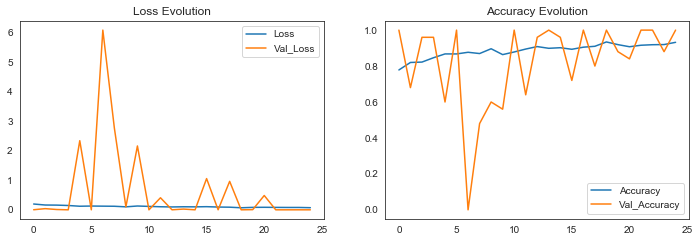

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [25]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3452/3452 [==============================] - 468s 136ms/step
Test Accuracy: 86.30%
1165/1165 [==============================] - 873s 749ms/step
Train Accuracy: 92.76%


# Evaluation

In [26]:
predicted_vals = model.predict(test, steps=len(test))

In [27]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[2265  283]
 [ 145  759]]


,0,1,micro avg,macro avg,weighted avg
precision,0.939834,0.728407,0.876014,0.834120,0.884466
recall,0.888932,0.839602,0.876014,0.864267,0.876014
f1-score,0.913675,0.780062,0.876014,0.846868,0.878685
support,2548.000000,904.000000,3452.000000,3452.000000,3452.000000


In [ ]:
model.save('desnet.h5')

In [1]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

    


Using TensorFlow backend.


In [16]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 180, 180, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [17]:

vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
    
model = Sequential()
model.add(vgg16_model.layers[0])


In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [19]:
r = vgg16_model.fit(train,
          epochs=25,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=300,
          validation_steps=25)



Epoch 1/25
  4/300 [..............................] - ETA: 16:54 - loss: 0.3401 - accuracy: 0.5625 - precision: 0.3498 - recall: 0.8875

Text(0.5, 1.0, 'Accuracy Evolution')

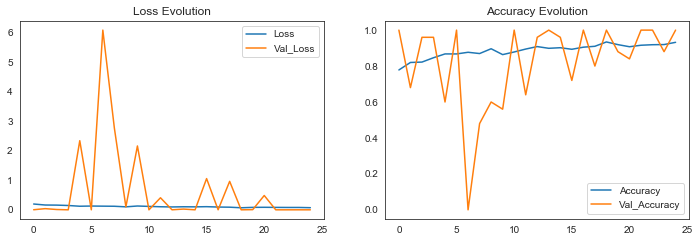

In [33]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [34]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3452/3452 [==============================] - 583s 169ms/step
Test Accuracy: 59.65%
1165/1165 [==============================] - 1027s 882ms/step
Train Accuracy: 71.01%


In [ ]:
model.save('vgg16.h5')

# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [15]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')



In [16]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 90, 90, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [17]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [18]:
r = resnet_model.fit(train,
          epochs=25,
          validation_data=validation,
          class_weight=class_weight,
        steps_per_epoch=300,
        validation_steps=25)


Epoch 1/25
300/300 [==============================] - 648s 2s/step - loss: 0.3277 - accuracy: 0.5046 - precision: 0.2754 - recall: 0.5312 - val_loss: 1.0383 - val_accuracy: 0.0000e+00 - val_precision: 0.2568 - val_recall: 0.5140
Epoch 2/25
300/300 [==============================] - 640s 2s/step - loss: 0.3009 - accuracy: 0.5252 - precision: 0.2628 - recall: 0.5175 - val_loss: 0.9235 - val_accuracy: 0.8400 - val_precision: 0.2704 - val_recall: 0.5196
Epoch 3/25
300/300 [==============================] - 660s 2s/step - loss: 0.2789 - accuracy: 0.5533 - precision: 0.2759 - recall: 0.5265 - val_loss: 0.4586 - val_accuracy: 0.8400 - val_precision: 0.2830 - val_recall: 0.5317
Epoch 4/25
300/300 [==============================] - 661s 2s/step - loss: 0.2771 - accuracy: 0.5446 - precision: 0.2844 - recall: 0.5311 - val_loss: 0.1425 - val_accuracy: 0.6400 - val_precision: 0.2862 - val_recall: 0.5317
Epoch 5/25
300/300 [==============================] - 660s 2s/step - loss: 0.2755 - accuracy: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

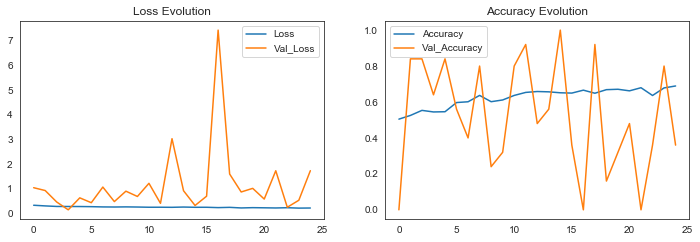

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [20]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3452/3452 [==============================] - 393s 114ms/step
Test Accuracy: 45.10%
1165/1165 [==============================] - 850s 729ms/step
Train Accuracy: 46.55%


In [21]:
model.save('resnet.h5')

## Comparing different models

In [22]:
model_mae_scores_dict = {'CNN': 86.21, 'DenseNet' : 92.73, 'VGG16' : 71.01, 'ResNet' : 46.55,}

In [23]:
model_mae_scores = pd.Series(model_mae_scores_dict)

In [24]:
model_mae_scores

CNN         86.21
DenseNet    92.73
VGG16       71.01
ResNet      46.55
dtype: float64

In [25]:
order = model_mae_scores.sort_values()

Text(0.5, 1.0, 'Accuracy of All model')

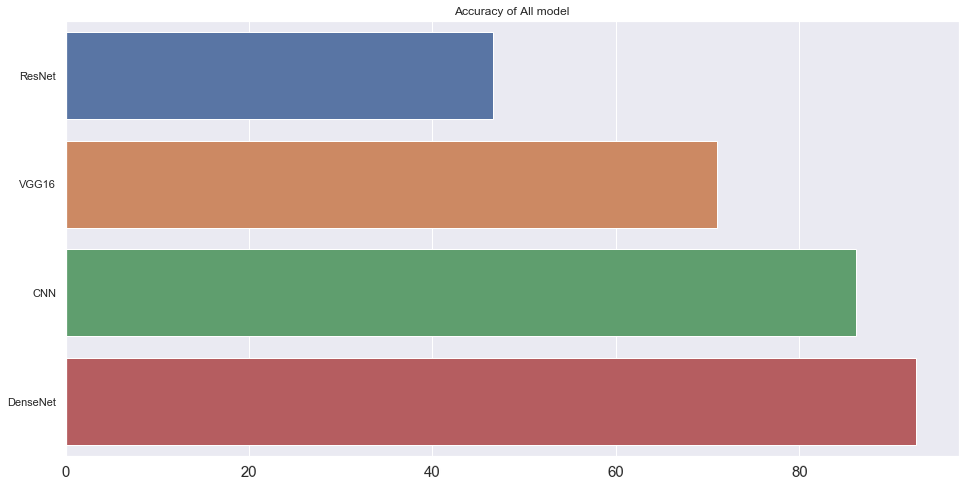

In [42]:
from matplotlib import pyplot
import seaborn as sns

sns.set_theme(style="darkgrid")
# sns.set_context('paper')
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x=order.values, y = order.index,orient="h")
# sns.barplot(x=order.index,y=order.index,orient="h")

plt.xticks(rotation=1,fontsize=15)
plt.title('Accuracy of All model')